In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 14})

In [2]:
bev_classes = ['unknown', 'occupied', 'free']

def get_log_data(logdir, model, filenames, mode):
    losses = {
        'bev loss': [],
        'depth loss': [],
        'joint-opt loss': []
    }
    mIOU = {
        'unknown': [],
        'occupied': [],
        'free': [],
    }
    mAP = {
        'unknown': [],
        'occupied': [],
        'free': [],
    }

    for filename in filenames:
        filepath = os.path.join(logdir, model, mode, "step_logs", filename)
        with open(filepath, 'rb') as f:
            logdata = pickle.load(f)
        
        for k, v in logdata.items():
            if k == 'bev_loss':
                losses['bev loss'].append(v)
            if 'depth' in k:
                losses['depth loss'].append(v)
            if 'combined' in k:
                losses['joint-opt loss'].append(v)
                
        for cls in bev_classes:
            mIOU[cls].append(logdata['bev_error/mIOU_cls'][cls])
            mAP[cls].append(logdata['bev_error/mAP_cls'][cls])
            
    return losses, mIOU, mAP

In [3]:
def plot_model_bev_metrics(logdir, model, mode):
    filenames = sorted(os.listdir(os.path.join(logdir, model, mode, "step_logs")), key=lambda x: int(os.path.splitext(x)[0]))

    losses, mIOU, mAP = get_log_data(logdir, model, filenames, mode)

    fig, ax = plt.subplots(ncols=2 , figsize=(12, 3))
    for cls in bev_classes:
        ax[0].set_title('mIOU')
        ax[0].plot(mIOU[cls], label=cls)
        ax[1].set_title('mAP')
        ax[1].plot(mAP[cls], label=cls)


    ax[0].legend()
    ax[1].legend()
    fig.suptitle(model)
    plt.tight_layout()
    plt.show()

In [4]:
logdir = '/scratch/shantanu/occupied_only_exps/'
models = os.listdir(logdir)
models

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/shantanu/occupied_only_exps/'

In [50]:
mode = 'val'  # plot data for which mode : train or val

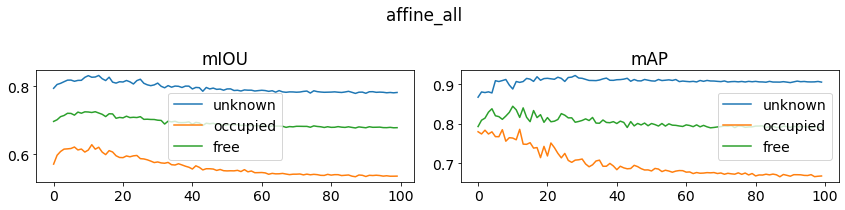

In [51]:
plot_model_bev_metrics(logdir, models[0], mode)

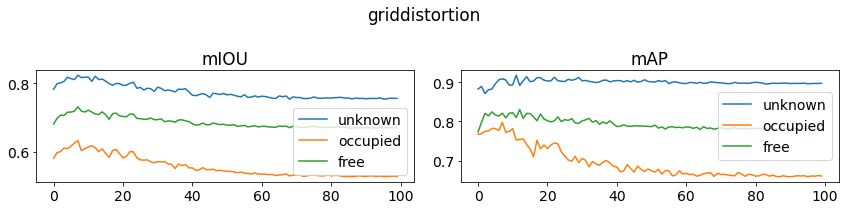

In [52]:
plot_model_bev_metrics(logdir, models[1], mode)

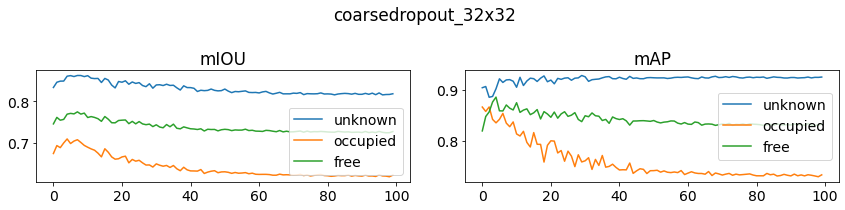

In [53]:
plot_model_bev_metrics(logdir, models[2], mode)

In [6]:
def plot_comparison(logdir, models, max_len=100, modes=['train', 'val']):

    fig, ax = plt.subplots(ncols=len(modes), nrows=4, figsize=(20,25))
    for model in models:
        for mode_idx, mode in enumerate(modes):
            filenames = sorted(os.listdir(os.path.join(logdir, model, mode, "step_logs")), key=lambda x: int(os.path.splitext(x)[0]))
            losses, mIOU, mAP = get_log_data(logdir, model, filenames, mode)

            ax[0][mode_idx].plot(losses['bev loss'][:max_len], label=model)
            ax[1][mode_idx].plot(mIOU['free'][:max_len], label=model)
            ax[2][mode_idx].plot(mIOU['occupied'][:max_len], label=model)
            ax[3][mode_idx].plot(mIOU['unknown'][:max_len], label=model)

    for axis in ax.flatten():
        axis.legend()

    for mode_idx, mode in enumerate(['TRAIN', 'TEST']):
        ax[0][mode_idx].set_title(mode + ': loss')
        ax[1][mode_idx].set_title(mode + ': mIOU-free')
        ax[2][mode_idx].set_title(mode + ': mIOU-occupied')
        ax[3][mode_idx].set_title(mode + ': mIOU-unknown')

    plt.show()

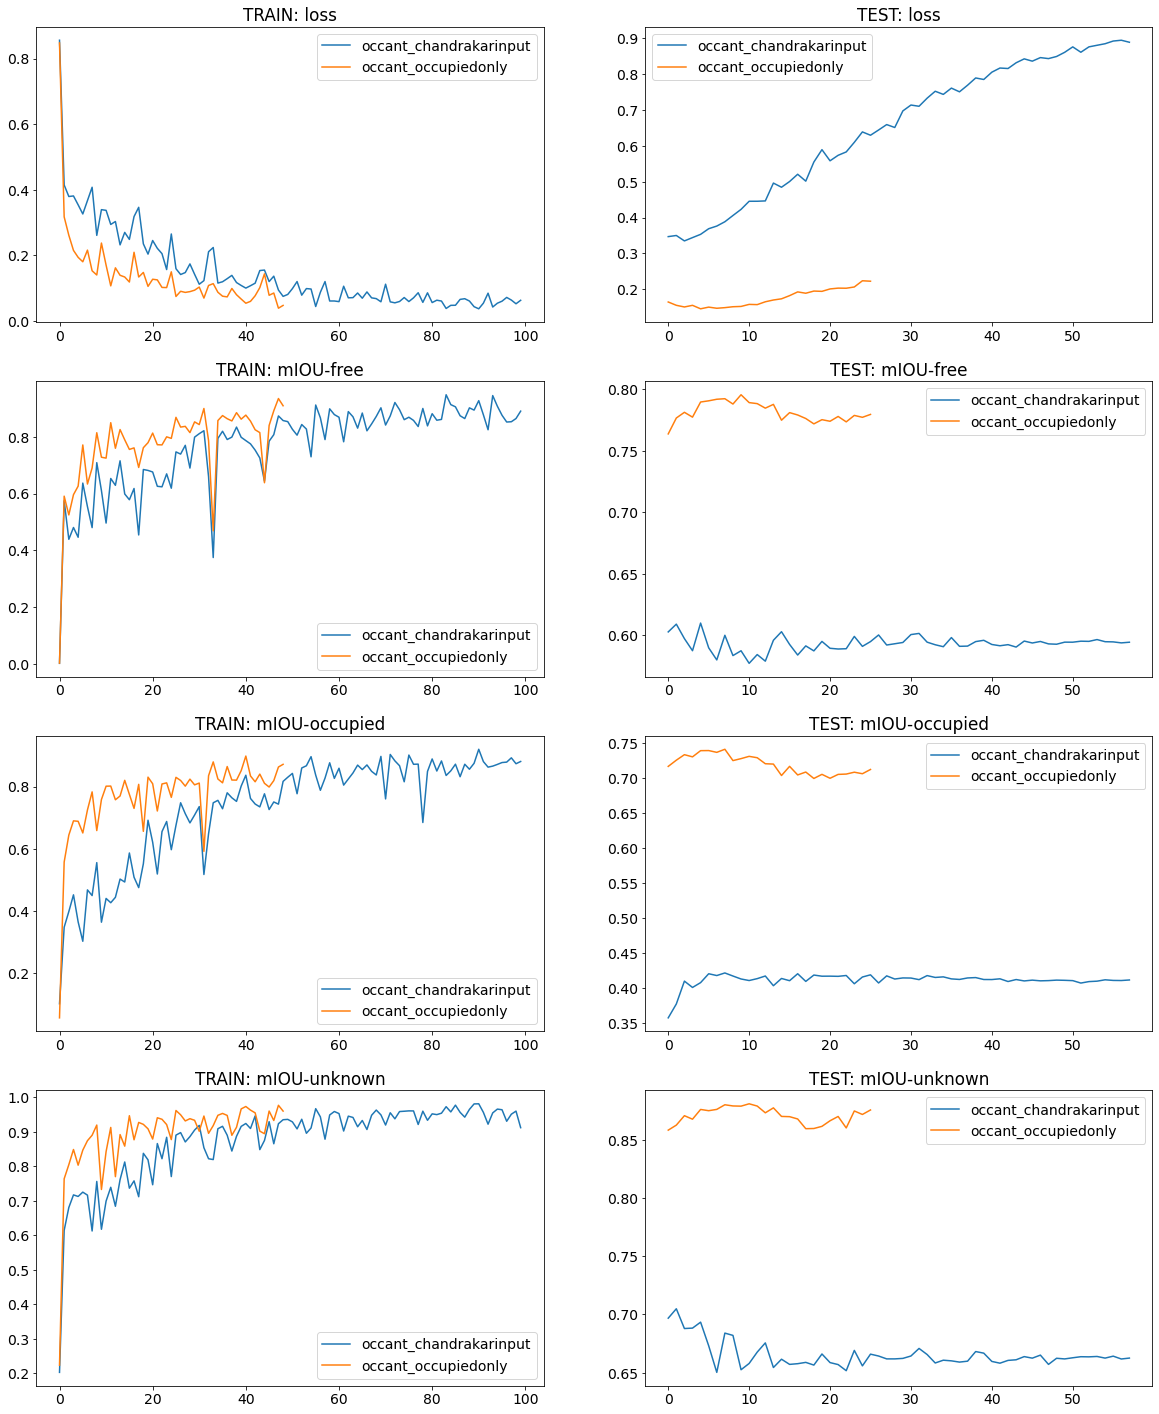

In [7]:
logdir = '/scratch/shantanu/occant_sim_exps3'

models = os.listdir(logdir)

tgt_models = [model for model in models if 'coarsedropout' in model] + ['baseline']

tgt_models = ['baseline', 'shift_0.2', 'scale_0.2', 'rotate_20', 
              'coarsedropout_32x32', 'affine_all', 'griddistortion']

tgt_models = models

plot_comparison(logdir, tgt_models, 100)

In [29]:
len(filenames)

100